In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [145]:
parkdf_ml = pd.read_csv('parkdf_ml.csv')

In [146]:
parkdf_ml.head()

,PARK,SIZE,BOROUGH,TOTAL
0,PELHAM BAY PARK,2771.75,BRONX,28
1,VAN CORTLANDT PARK,1146.43,BRONX,55
2,ROCKAWAY BEACH AND BOARDWALK,1072.56,QUEENS,80
3,FRESHKILLS PARK,913.32,STATEN ISLAND,1
4,FLUSHING MEADOWS CORONA PARK,897.69,QUEENS,287


In [147]:
parkdf_ml.dtypes

PARK        object
SIZE       float64
BOROUGH     object
TOTAL        int64
dtype: object

In [148]:
parkdf_ml['BOROUGH'] = parkdf_ml['BOROUGH'].astype(str)

In [149]:
parkdf_ml.dtypes

PARK        object
SIZE       float64
BOROUGH     object
TOTAL        int64
dtype: object

In [80]:
parkdf_ml.values

array([['PELHAM BAY PARK', 2771.75, 'BRONX        ', 28],
       ['VAN CORTLANDT PARK', 1146.43, 'BRONX        ', 55],
       ['ROCKAWAY BEACH AND BOARDWALK', 1072.56, 'QUEENS       ', 80],
       ...,
       ['PLAYGROUND OF THE AMERICAS', 0.08, 'MANHATTAN    ', 0],
       ['PRIVATE WILLIAM GRAY PARK', 0.07, 'QUEENS       ', 0],
       ["ADRIENNE'S PLAYGROUND", 0.0, 'MANHATTAN    ', 0]], dtype=object)

In [150]:
parkdf_ml["BOROUGH"].unique()

array(['BRONX        ', 'QUEENS       ', 'STATEN ISLAND', 'BROOKLYN     ',
       'BROOKLYN/QUEENS', 'MANHATTAN    '], dtype=object)

In [151]:
queens = parkdf_ml.loc[parkdf_ml["BOROUGH"] == "QUEENS       "]

In [152]:
queens.reset_index()

,index,PARK,SIZE,BOROUGH,TOTAL
0,2,ROCKAWAY BEACH AND BOARDWALK,1072.56,QUEENS,80
1,4,FLUSHING MEADOWS CORONA PARK,897.69,QUEENS,287
2,10,ALLEY POND PARK,635.51,QUEENS,23
3,12,FOREST PARK,506.86,QUEENS,37
4,13,GRAND CENTRAL PARKWAY,460.16,QUEENS,0
5,16,CUNNINGHAM PARK,358.00,QUEENS,21
6,18,CROSS ISLAND PARKWAY,326.90,QUEENS,0
7,23,ROCKAWAY COMMUNITY PARK,255.40,QUEENS,1
8,24,KISSENA PARK,237.15,QUEENS,26
9,34,BELT PARKWAY,202.65,QUEENS,0


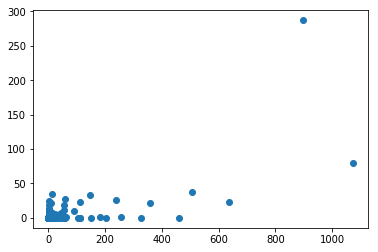

In [153]:
plt.scatter(queens["SIZE"],queens["TOTAL"])

In [154]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [155]:
X = queens.SIZE.values.reshape(-1, 1)
y = queens.TOTAL.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (284, 1) (284, 1)


In [156]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.11771476]]
y-axis intercept:  [0.64722541]


In [158]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.07]]
Max X Value: [[1072.56]]


In [159]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

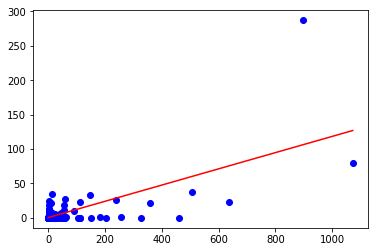

In [160]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [161]:
from sklearn.metrics import mean_squared_error, r2_score
# Use our model to predict a value
# A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.

predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 178.58397501858767
R-squared (R2 ): 0.46681395346576093


In [162]:
# Overall Score for the model
model.score(X, y)

0.46681395346576093

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [164]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [165]:
model.score(X_test, y_test)

0.27863007672472373

In [ ]:
# Maybe the features are more correlated for Queens than the other boroughs
# The number of the data